In [1]:
import pandas as pd
import os
import numpy as np
from citipy import citipy
from config import api_key
import requests
import json
import matplotlib.pyplot as plt

In [2]:
min_lat = (-90)
max_lat = (90)
min_lon = (-180)
max_lon = (180)

In [3]:
latitudes = []
longitudes = []

for lats in np.random.randint(min_lat,max_lat,2000):
    latitudes.append(lats)
for lons in np.random.randint(min_lon,max_lon,2000):
    longitudes.append(lons)

In [4]:
cities_table = pd.DataFrame()
cities_table['Latitude']  = latitudes
cities_table['Longitude']  = longitudes

In [5]:
locations = cities_table.to_records(index=False)
cities_tuple = list(locations)

In [6]:
#find nearest cities to all latitudes and longitudes using citipy
cities = []
country = []

for lat,lon in cities_tuple:
    city = citipy.nearest_city(lat,lon)
    CityNames = city.city_name
    cities.append(CityNames)
    country.append(city.country_code)

In [7]:
data = pd.DataFrame({'Cities': cities,'Country': country})

In [8]:
len(pd.unique(data['Cities']))

769

In [9]:
data = data.drop_duplicates(subset=['Cities'],keep='first')

In [10]:
data['Latitude'] = ''
data['Longitude'] = ''
data['Temperature (F)'] = ''
data['Humidity (%)'] = ''
data['Cloudiness (%)'] = ''
data['Wind Speed (mph)'] =''

In [11]:
for index,row in data.iterrows():
    city_api = row['Cities']
    country_api = row['Country']
    api_url = "http://api.openweathermap.org/data/2.5/weather" \
    "?q={},{}&units=imperial&mode=json&APPID={}".format(city_api,country_api,api_key)
    
    country_city = requests.get(api_url).json()
    print(api_url)    
    
    try:
        data.at[index,'Latitude'] = (country_city['coord']['lat'])
        data.at[index,'Longitude'] = (country_city['coord']['lon'])
        data.at[index,'Temperature (F)'] = (country_city['main']['temp'])
        data.at[index,'Humidity (%)'] = (country_city['main']['humidity'])
        data.at[index,'Cloudiness (%)'] = (country_city['clouds']['all'])
        data.at[index,'Wind Speed (mph)'] = (country_city['wind']['speed'])
        
    except KeyError:
        data.at[index,'Latitude'] = (np.nan)
        data.at[index,'Longitude'] = (np.nan)
        data.at[index,'Temperature (F)'] = (np.nan)
        data.at[index,'Humidity (%)'] = (np.nan)
        data.at[index,'Cloudiness (%)'] = (np.nan)
        data.at[index,'Wind Speed (mph)'] = (np.nan)
        
        print('Weather information is not available...next')


http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=khuzhir,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?q=lishui,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=inhambane,mz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=singanallur,in&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=opuwo,na&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=panzhihua,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bilibino,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837fa

http://api.openweathermap.org/data/2.5/weather?q=high rock,bs&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=brokopondo,sr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=xixiang,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=vanimo,pg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=okha,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=airai,pw&units=imperial&m

http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=dickinson,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sorong,id&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=karaton,kz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=virginia beach,us&units=

http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sapucaia,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=ahuimanu,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=dolbeau,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=constantine,dz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk,ru&units=imperial&mode=

http://api.openweathermap.org/data/2.5/weather?q=miandrivazo,mg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=beboto,td&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=petrozavodsk,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bariri,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=general roca,ar&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=la ronge,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c

http://api.openweathermap.org/data/2.5/weather?q=sao sebastiao,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=moree,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=deer lake,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=jardim,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=oistins,bb&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sayyan,ye&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=wajima,jp&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http

http://api.openweathermap.org/data/2.5/weather?q=beba,eg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=lyuban,by&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=praia,cv&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=axim,gh&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=plouzane,fr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=hecelchakan,mx&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=

http://api.openweathermap.org/data/2.5/weather?q=inuvik,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=santo antonio do amparo,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sajoszoged,hu&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=neman,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tongzi,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=koslan,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=galesong,id&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c766

http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tigil,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=jaromerice nad rokytnou,cz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=greenwood,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=brody,ua&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=velingrad,bg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hovd,mn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c4

http://api.openweathermap.org/data/2.5/weather?q=alekseyevsk,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=mahalapye,bw&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=pedra azul,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tuzla,ro&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=lingao,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=darhan,mn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=zhaotong,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=otavi,na&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http

http://api.openweathermap.org/data/2.5/weather?q=killybegs,ie&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=newcastle,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sorland,no&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=asau,tv&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=petukhovo,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=nyrob,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=pastavy,by&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=lubao,cd&units=imperial&mode=json&APPI

http://api.openweathermap.org/data/2.5/weather?q=saryg-sep,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kaeo,nz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=anchorage,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=nhulunbuy,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf


In [12]:
data.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,puerto ayora,ec,-0.7393,-90.3518,71.55,86,97,8.01
1,ushuaia,ar,-54.8,-68.3,37.06,75,40,17.27
2,bathsheba,bb,13.2167,-59.5167,77.61,88,75,25.32
3,amderma,ru,NaN,NaN,NaN,NaN,NaN,NaN
4,nizhneyansk,ru,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_dropna = (data.dropna())

In [14]:
data_dropna.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,puerto ayora,ec,-0.7393,-90.3518,71.55,86,97,8.01
1,ushuaia,ar,-54.8,-68.3,37.06,75,40,17.27
2,bathsheba,bb,13.2167,-59.5167,77.61,88,75,25.32
5,tasiilaq,gl,65.6145,-37.6368,41.77,83,43,3.2
6,khuzhir,ru,53.1939,107.34,53.98,80,75,7.61


In [15]:
len(data_dropna)

685

In [16]:
data_dropna.dtypes

Cities              object
Country             object
Latitude            object
Longitude           object
Temperature (F)     object
Humidity (%)        object
Cloudiness (%)      object
Wind Speed (mph)    object
dtype: object

In [17]:
data_dropna['Latitude'] = pd.to_numeric(data_dropna['Latitude'])
data_dropna['Longitude'] = pd.to_numeric(data_dropna['Longitude'])
data_dropna['Temperature (F)'] = pd.to_numeric(data_dropna['Temperature (F)'])
data_dropna['Humidity (%)'] = pd.to_numeric(data_dropna['Humidity (%)'])
data_dropna['Cloudiness (%)'] = pd.to_numeric(data_dropna['Cloudiness (%)'])
data_dropna['Wind Speed (mph)'] = pd.to_numeric(data_dropna['Wind Speed (mph)'])

<ipython-input-17-d68f9622be91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropna['Latitude'] = pd.to_numeric(data_dropna['Latitude'])
<ipython-input-17-d68f9622be91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropna['Longitude'] = pd.to_numeric(data_dropna['Longitude'])
<ipython-input-17-d68f9622be91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [18]:
data_dropna.to_csv("../Resources/cities_and_weather.csv", sep=',', encoding='utf-8', header='true')

In [19]:
southern_temp = data_dropna[data_dropna['Latitude'] < 0]
northern_temp = data_dropna[data_dropna['Latitude'] > 0]

<AxesSubplot:xlabel='Temperature (F)', ylabel='Latitude'>

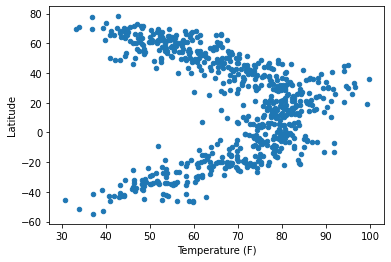

In [20]:
data_dropna.plot.scatter(x='Temperature (F)', y='Latitude')

<AxesSubplot:xlabel='Humidity (%)', ylabel='Latitude'>

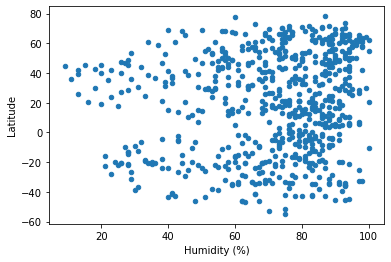

In [21]:
data_dropna.plot.scatter(x='Humidity (%)', y='Latitude')

<AxesSubplot:xlabel='Cloudiness (%)', ylabel='Latitude'>

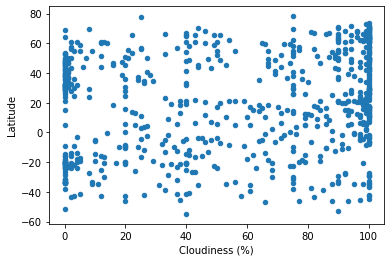

In [22]:
data_dropna.plot.scatter(x='Cloudiness (%)', y='Latitude')

<AxesSubplot:xlabel='Wind Speed (mph)', ylabel='Latitude'>

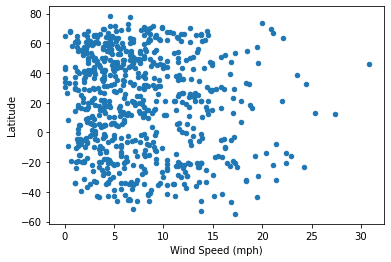

In [23]:
data_dropna.plot.scatter(x='Wind Speed (mph)', y='Latitude')

The r-squared is: 0.6033202431383419


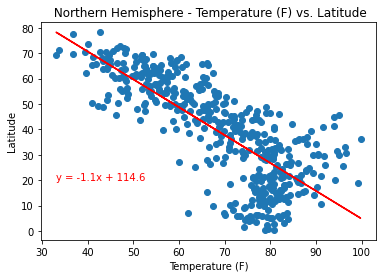

In [35]:
from scipy.stats import linregress
north_temp_regress_val = (northern_temp.iloc[:,4])
north_lat_regress_val = (northern_temp.iloc[:,2])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp_regress_val, north_lat_regress_val)
regress_values = north_temp_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_temp_regress_val,north_lat_regress_val)
plt.plot(north_temp_regress_val,regress_values,"r-")
plt.annotate(line_eq,(33,20),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/nrt_tmp.png")
plt.show()

The r-squared is: 0.0003663611109728279


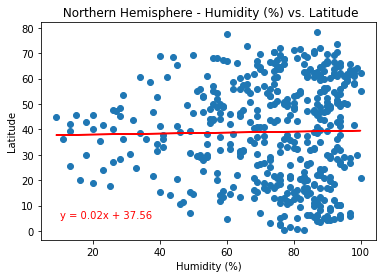

In [47]:
north_hum_regress_val = (northern_temp.iloc[:,5])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hum_regress_val, north_lat_regress_val)
regress_values = north_hum_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hum_regress_val,north_lat_regress_val)
plt.plot(north_hum_regress_val,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/nrt_hmd.png")
plt.show()

The r-squared is: 0.0004113824415945382


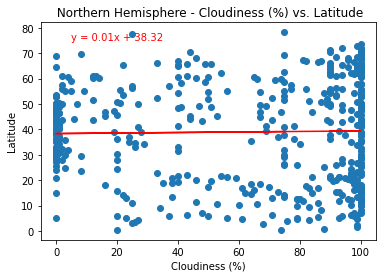

In [44]:
north_cloud_regress_val = (northern_temp.iloc[:,6])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloud_regress_val, north_lat_regress_val)
regress_values = north_cloud_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cloud_regress_val,north_lat_regress_val)
plt.plot(north_cloud_regress_val,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/nrt_cld.png")
plt.show()

The r-squared is: 0.0005161322691469644


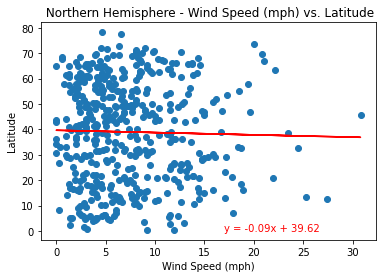

In [27]:
#nothern_temp.plot.scatter(x='Wind Speed (mph)', y='Latitude')
north_wind_regress_val = (northern_temp.iloc[:,7])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind_regress_val, north_lat_regress_val)
regress_values = north_wind_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_wind_regress_val,north_lat_regress_val)
plt.plot(north_wind_regress_val,regress_values,"r-")
plt.annotate(line_eq,(17,0),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/nrt_wnd.png")
plt.show()

The r-squared is: 0.6829358662557664


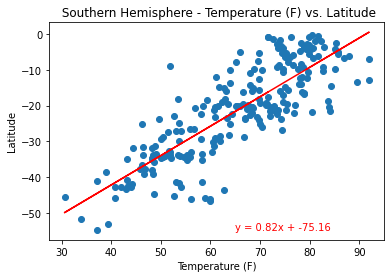

In [28]:
#southern_temp.plot.scatter(x='Temperature (F)', y='Latitude')
south_temp_regress_val = (southern_temp.iloc[:,4])
south_lat_regress_val = (southern_temp.iloc[:,2])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp_regress_val, south_lat_regress_val)
regress_values = south_temp_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_temp_regress_val,south_lat_regress_val)
plt.plot(south_temp_regress_val,regress_values,"r-")
plt.annotate(line_eq,(65,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/sth_tmp.png")
plt.show()

The r-squared is: 0.0007792589694886294


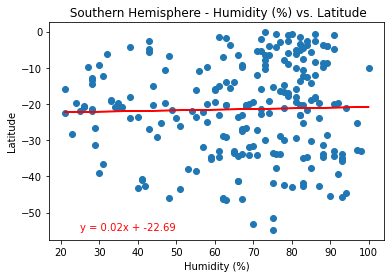

In [29]:
#southern_temp.plot.scatter(x='Humidity (%)', y='Latitude')
south_hum_regress_val = (southern_temp.iloc[:,5])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hum_regress_val, south_lat_regress_val)
regress_values = south_hum_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hum_regress_val,south_lat_regress_val)
plt.plot(south_hum_regress_val,regress_values,"r-")
plt.annotate(line_eq,(25,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/sth_hmd.png")
plt.show()

The r-squared is: 0.005632914186926806


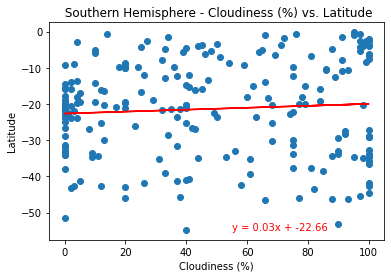

In [30]:
#southern_temp.plot.scatter(x='Cloudiness (%)', y='Latitude')
south_cloud_regress_val = (southern_temp.iloc[:,6])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloud_regress_val, south_lat_regress_val)
regress_values = south_cloud_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cloud_regress_val,south_lat_regress_val)
plt.plot(south_cloud_regress_val,regress_values,"r-")
plt.annotate(line_eq,(55,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/sth_cld.png")
plt.show()

The r-squared is: 0.013740189384450908


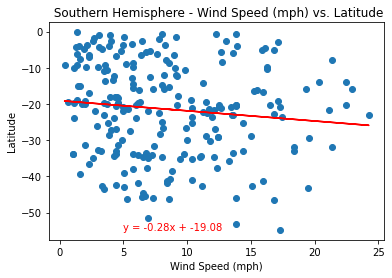

In [31]:
#southern_temp.plot.scatter(x='Wind Speed (mph)', y='Latitude')
south_wind_regress_val = (southern_temp.iloc[:,7])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind_regress_val, south_lat_regress_val)
regress_values = south_wind_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_wind_regress_val,south_lat_regress_val)
plt.plot(south_wind_regress_val,regress_values,"r-")
plt.annotate(line_eq,(5,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/sth_wnd.png")
plt.show()

In [ ]:
print("In the Temperature vs Latidue, temperature appears to increase with as latitude increases")
print("There does no seem to be any correlation between cloudiness and latitude")